In [1]:
import tensorflow as tf
print(tf.__version__)
#1.15.3 방식의 차이, 속도가 빠르고 안정적
#2.3 환경을 유리하게 구성 - 프로그램이 쉽기 떄문에 대세

1.15.3


In [2]:
hello = tf.constant("Hello Tensorflow")
#상수를 지정한다.
sess = tf.Session() #병렬처리를 전제로해서 작성하였기 때문에 세션을 연결해야 한다.
#(자료구조는 그래프형식 - 노드에 연결된 값이 전체계산되어야 계산 된다.) -> 그래프의 꼭지만 실행하면 모든그래프가 실행된다.
print(hello)
#노드와 노드를 연결하는것은 텐서
#내용을 호출하는것 - 세션을 연결해야한다.
print(sess.run(hello))

Tensor("Const:0", shape=(), dtype=string)
b'Hello Tensorflow'


In [3]:
x = tf.constant(35, name='x')
y = tf.Variable(x+5, name='y') #계산식 노드, x와 연결되어 있다.(계산식안에 존재한다.)
print(y)
#Graph : constant, variable, placeholder

<tf.Variable 'y:0' shape=() dtype=int32_ref>


In [4]:
init = tf.global_variables_initializer() #variable시 반드시 호출해야한다. 세트로 사용 -> 반드시 run해야한다.
with tf.Session() as session:
    session.run(init)
    print(session.run(y))
    #마지막 꼭지를 돌리면 된다.(꼭지를 돌리면 안에 내포된 노드들이 자동으로 계산된다.)

40


In [5]:
a = tf.constant([1,2,3], name='a') #이름을 주었다. tensorboar(그래프 구조 시각화하는 놈)에서 구분, 모델저장시 사용된다.
#저장했다 로딩할 때는 위치를 구분할 수 없다. name으로 데이터를 참조할 수 있다.
b = tf.constant([4,5,6], name='b')
add_op = a+b
with tf.Session() as session:
    print(session.run(add_op))

[5 7 9]


In [6]:
a = tf.placeholder(tf.int16) #주입변수 - 외부에서 변수가 feeding된다.
b = tf.placeholder(tf.int16)
add = tf.add(a,b) #더하는 계산식이 있는 노드
mul = tf.multiply(a,b) #곱하는 계산식이 있는 노드
total = tf.multiply(add, mul)

In [7]:
with tf.Session() as sess:
    print('feed 변수합 : %i'%sess.run(add, feed_dict = {a:2, b:3}))
    print('feed 변수곱 : %i'%sess.run(mul, feed_dict = {a:2, b:3}))
    print('feed 변수총곱 : %i'%sess.run(total, feed_dict = {a:2, b:3}))

feed 변수합 : 5
feed 변수곱 : 6
feed 변수총곱 : 30


In [8]:
#variable은 가중치를 저장하는데 사용
#placeholder는 훈련데이터를 전달하는데 사용된다.

In [9]:
my_var = tf.Variable(3, name='var1')
add = tf.add(5, my_var)
num = tf.multiply(8, my_var)
my_var = num
zeros = tf.zeros([2,2]) #numpy 선형대수 초기화 함수들처럼 tensorflow에도 linelg 함수들이 있다.
ones = tf.ones([6])
#대부분 가중치는 랜덤으로 초기화 된다.
uniform = tf.random_uniform([3,3,3], minval=0.0, maxval=10) #균등분포
normal = tf.random_normal([3,3,3], mean=0.0, stddev=2.0) #정규분포
trunc = tf.truncated_normal([2,2], mean=5.0, stddev=1.0) #범위를 넘어서면 다시 발생시킨다.(정규분포 표준편차 2배수안)
random_var = tf.Variable(tf.truncated_normal([2,2]))
#Variable - 반드시 초기화를 해주어야 한다.  -> global_variables_initializer

In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(normal))
print(sess.run(trunc))
print('변수초기화', sess.run(random_var))
print(sess.run(my_var))

[[[-2.1193948  -0.69962317  2.3761997 ]
  [-2.1063135   1.241432   -0.37641466]
  [ 1.3481439   1.2008075   3.8623884 ]]

 [[ 2.4435372  -2.303993    2.9639223 ]
  [-1.7240126   1.5579128   2.83079   ]
  [-0.53677857  0.4729932   0.264199  ]]

 [[ 0.5648883   2.2149122  -2.593795  ]
  [-0.63140905  0.30658558  0.49794763]
  [ 1.3328693  -0.4094291   1.1246842 ]]]
[[4.670225  6.723273 ]
 [5.4078126 5.615126 ]]
변수초기화 [[0.40524745 0.20708238]
 [0.6301048  1.0870813 ]]
24


In [11]:
sess = tf.Session()
#역행렬을 만들수 없으면 에러남
x = tf.constant([2.0, 1.0, 1.0, 4,3,4,-4,2,2], shape=[3,3])
print(sess.run(x))
#x,y,z 3차 연립방정식 3개

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]


In [12]:
y = tf.constant([1.0, 2, -6], shape=[3,1])
#result y값 3개
print(sess.run(y))

[[ 1.]
 [ 2.]
 [-6.]]


In [13]:
z = tf.matrix_solve(x,y) #x역행렬을 곱해서 연립방정식의 해를 구해주었다.
result = sess.run(z)
print('계수', result)
#연립방정식의 해를 구하고 있음

계수 [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]


In [14]:
a = tf.matmul(x,z)
print(sess.run(a)) #검산 y값과 동일

[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [15]:
x_1 = tf.matrix_inverse(x) #inverse값 -> 행렬나눗셈이 없으므로 역행렬을 구해서 곱한다.
z = tf.matmul(x_1, y)
print('해 : ', sess.run(z))
#matrix_solve - 이놈이 자동으로 역행렬을 구해서 곱해줌
#역행열을 구하고 행렬곱을 통해 해를구함

해 :  [[ 1.0000002]
 [-2.0000005]
 [ 1.0000002]]


In [16]:
a = tf.constant([1,2,3,4,5,6], shape=[2,3])
a = tf.to_float(a)
s,u,v = tf.svd(a) 
#특이행렬분해(singular value decomposition) 대상 : 비정방행렬
#고유치 : u
#직교행렬 : v
print(sess.run(u))

Instructions for updating:
Use `tf.cast` instead.
[[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]


In [17]:
print(sess.run(tf.transpose(a))) #역행렬을 구하는 방법

[[1. 4.]
 [2. 5.]
 [3. 6.]]


In [18]:
x = tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]]) #2*2*3의 3차원행렬(면*행*렬)
print(sess.run(tf.shape(x)))
print(sess.run(x))

[2 2 3]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [19]:
sess.run(tf.transpose(x)) #3*2*2(면과 열이 바꼈다.)

array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [20]:
y = tf.transpose(x, perm=[0,2,1]) #2*2*3 -> 2*3*2 행과 열을 바꿔라(0,2,1)
sess.run(tf.transpose(y))

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [21]:
#3차원을 거듭제곱 하는법 : 열과 행만 바뀌어 있으면 제곱을 할 수 있다. (면은 노상관)
sess.run(tf.matmul(x,tf.transpose(x,perm=[0,2,1]))) 
# 2*2*3  * 2*3*2 = 2*2*2 (행렬간의 연산을 생각해라.)
#거듭제곱 -> 정방행렬, 대칭행렬이 된다.

array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]])

In [22]:
t = [1,2,3,4,5,6] #데이터 6개
t = tf.reshape(t, [1,2,1,3,1,1]) #다 곱하면 6 -> 각 차원당 데이터 수
sess.run(t)
#6차원 꺽쇠 6개 [[[[[[, 행렬곱의 규칙 - 앞의 열과 뒤의 행의 수가 같아야 한다. -> 앞의 행* 뒤의 열을 가진 행렬이 생성
#안맞을경우 reshape을 통해 맞춰줘야 한다.(차원만 늘린다. 요소수는 동일)

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [23]:
print('차원의 수를 축소 : ', sess.run(tf.shape(tf.squeeze(t)))) #1차원을 전부 없애 준다.(1차원인 놈을 전부 제거)
#2와 3만 남았다.

차원의 수를 축소 :  [2 3]


In [24]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12] #12개
print(sess.run(tf.reshape(tensor, [2,-1]))) #-1은 계산해서 채워라
print(sess.run(tf.reshape(tensor, [2, -1, 3]))) #-1은 여기서 2가 된다.(나머지 값들을 주고 알아서 계산해서 넣으라는 말)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [25]:
t = [[1,2,3],[4,5,6]]
padding = [[1,1],[2,2]] #CNN(convolution neural network)에서 padding을 해주어야한다.
#컴볼루션 연산을 하게되면 자동으로 사이즈가 줄어든다.
#원래의 사이즈와 일치시키기 위해서 0으로 채워준다.
#행을 위아래로 하나씩 늘임 [1,1]
#열을 양옆으로 하나씩 늘임 [2,2]
print(sess.run(tf.pad(t, padding, 'CONSTANT'))) #CONSTANT 0으로 채움

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [26]:
paddings = [[1,1],[1,1]]
print(sess.run(tf.pad(t, paddings, 'REFLECT'))) #복사되어 반복된다.

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [27]:
paddings = [[1,1],[1,1]]
print(sess.run(tf.pad(t, paddings, 'SYMMETRIC'))) #끝에있는 애가 복사된다.

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


In [28]:
def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        #run 실행시 numpy 데이터로 변경가능 -> 후에 시각화 가능
        return sess.run(variable)
    #텐서 플로우의 데이터도 시각화가 가능하다.

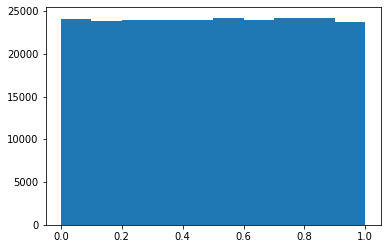

In [29]:
my_distribution = tf.random_uniform((600,400), seed=42)
uniform = run_variable(my_distribution)
from matplotlib import pyplot as plt
plt.hist(uniform.flatten())
plt.show()

In [30]:
#entropy

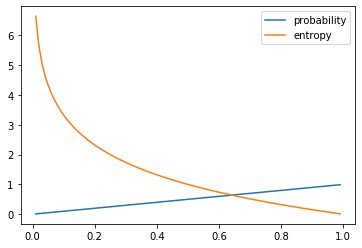

In [31]:
import numpy as np
import matplotlib.pyplot as plt
def entropy(p):
    #복잡도를 나타내는 지표이다.
    #확률이 높으면 복잡도는 낮아진다.
    #확률이 낮으면 복잡도는 높아진다.
    return -np.log2(p)
x = np.arange(0.01, 1, 0.01)
#확률값은 0~1사이의값
plt.plot(x, x, label='probability')
plt.plot(x, entropy(x), label='entropy')
plt.legend()
#복잡도는 낮추는게 목표가 된다. - costfunction이 된다. 위치마다 미분이 가능
#cost function은 미분이 가능해야 한다.

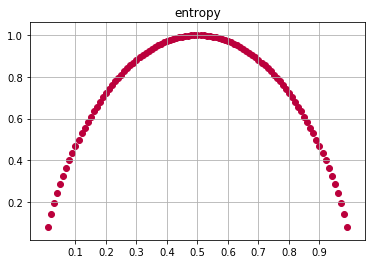

In [32]:
#2개의 클래스가 존재할때 어떤것을 선택할지 모른다. ->  분류복잡도 cost function 미분이 가능하다.
# -를 붙이는 이유는 로그함수의 값의 영역 때문에
#cost function으로 사용
def cross_entropy(p):
    #크로스 엔트로피
    return -(p*np.log2(p)+(1-p)*np.log2(1-p))
x = np.arange(0.01, 1, 0.01)
y = cross_entropy(x)
plt.title('entropy')
plt.xticks(np.arange(0.1,1,0.1))
plt.grid()
plt.scatter(x,y,color='#BB003C')
#0.5일때 가장 높은 이유는 둘중에 선택하기가 어렵기 때문에

In [33]:
#만약 숫자를 분리한다고 하면 0,1,2,3,4,5,6,7,8,9 확률값들을 전부 지수를 내서 더하면 총합이 1이된다.
#그것의 확률값이 가장높은것으로 분류된다.
#다중분류기 - 지수함수를 사용한다.(비선형, 증가하는 함수를 보이기 때문에)
def softmax(x):
    #총합이 1인 확률값으로 다중분류시 사용한다.
    if x.ndim ==2:
        x = x.T
        x = x-np.max(x, axis=0)
        y = np.exp(x)/np.sum(np.exp(x), axis=0)
        return y.T

60000
600.0
train acc, test acc | 0.11236666666666667,0.1135
train acc, test acc | 0.7908166666666666,0.7958
train acc, test acc | 0.8784166666666666,0.8819
train acc, test acc | 0.8998333333333334,0.9017
train acc, test acc | 0.9080333333333334,0.9126
train acc, test acc | 0.9138833333333334,0.9157
train acc, test acc | 0.91915,0.9214
train acc, test acc | 0.92355,0.9254
train acc, test acc | 0.9266166666666666,0.9275
train acc, test acc | 0.93005,0.9323
train acc, test acc | 0.93255,0.9323
train acc, test acc | 0.9358,0.9365
train acc, test acc | 0.9376833333333333,0.9392
train acc, test acc | 0.9395166666666667,0.9385
train acc, test acc | 0.94195,0.9413
train acc, test acc | 0.9442333333333334,0.9436
train acc, test acc | 0.9462166666666667,0.9435


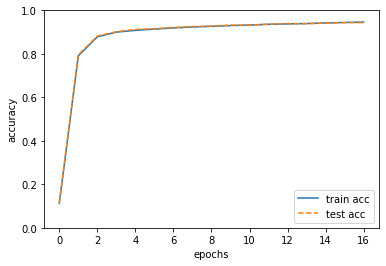

In [34]:
import sys, os
#sys - 파이썬에 관한 사항을 다룬다.
#os - 윈도우에 관한 내용을 다룸(디렉토리 생성, 파일생성)
sys.path.append(os.pardir) #현재 작업 디렉토리의 부모디렉토리를 path로 삼는다.
#class base로 모델을 작성
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet #파이썬 파일

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True) #데이터 로딩
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
#가중치 ?*784 -> 784*50 -> 50*10 -> 10개의 레벨이 존재한다.
iters_num = 10000 #반복횟수 (epochs)
train_size = x_train.shape[0] #데이터 사이즈
print(train_size)
batch_size = 100 #데이터가 100개 들어갈거다. (행)
learning_rate = 0.1 #역전파시 오차를 적용할 비율을 얘기한다.

train_loss_list = [] #loss값의 변화추세를 보기위해 값을 회전마다 저장
train_acc_list = [] #accuracy값
test_acc_list = []

#10000*iter_per_epoch = 실제 회전횟수 ? 아니래 갑자기
#60000 -> 600번?
iter_per_epoch = max(train_size/batch_size, 1) #실 데이터 사이즈에 batch사이즈를 나눈것
print(iter_per_epoch)
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask] #독립변수
    t_batch = t_train[batch_mask] #종속변수
    
    grad = network.gradient(x_batch, t_batch) #경사하강법을 적용(구해진 학습할 양이 grad에 담긴다.)
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]  #가중치 수정
    loss = network.loss(x_batch, t_batch) #손실량을 잰다.
    train_loss_list.append(loss)
    
    if i%iter_per_epoch == 0:
        #600번마다 한번씩 얘를 출력해줘라 -> 데이터 한번이 다 회전
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test) #훈련데이터의 어큘러시
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | '+ str(train_acc) +","+ str(test_acc))
markers = {'train':'o', "test":'s'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
#tensorflow에서 만들어 놓은 함수를 사용하게되면
#이 기능들을 내포하고 있다.

In [35]:
10000/600 #번 출력이 된다.

16.666666666666668


 Sigmoid & Relu 함수의 최적화 0.75
sigmoid = 0.12655206 relu = 2.0227606
sigmoid = 0.17863758 relu = 0.7530296
sigmoid = 0.24769813 relu = 0.7492897
sigmoid = 0.3446748 relu = 0.7499546
sigmoid = 0.4400661 relu = 0.7539999
sigmoid = 0.5236898 relu = 0.754772
sigmoid = 0.58373857 relu = 0.7508698
sigmoid = 0.62733483 relu = 0.7470234
sigmoid = 0.6549499 relu = 0.75180537
sigmoid = 0.67452586 relu = 0.75470716


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from cur

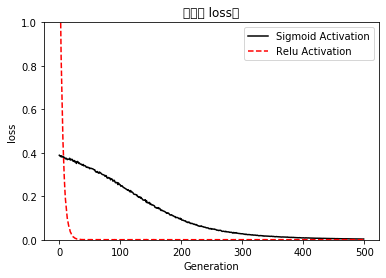

In [49]:
#sigmoid & relu 를 비교
from tensorflow.python.framework import ops
ops.reset_default_graph() #이놈을 호출하기 위해
#static 방식과 dynamic 방식이 있다.
#static 방식 - 그래프를 한번 생성하면 다시 생성할 수 없다.

sess = tf.Session() #세션연결
tf.set_random_seed(5) #텐서생성
np.random.seed(42) #np생성
batch_size = 50

#가중치와 바이어스는 y = ax+b
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2,0.1,500) #평균2 표준편차0.1 데이터갯수500

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32) 
#데이터 주입변수, 행이몇개인지는 모르겠고->입력되는 행렬수로 none이 결정된다. none = 입력되는 데이터수로 결정해라.

sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1)) #예측하는 단계, 예측후 sigmoid
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2)) #예측하는 단계, 예측후 relu

#MSE값이 된다.
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75))) #0.75로 가상으로 잡아서 평균을 냈다.
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

init = tf.global_variables_initializer()
sess.run(init)

#최적화기 - GradientDescentOptimizer 제일간단
#미분을 명시적으로 하지 않는다 -> tensorflow에서 자동으로 이루어진다.(최적화기에서)
my_opt = tf.train.GradientDescentOptimizer(0.01) #매개변수 러닝레이트
train_step_sigmoid = my_opt.minimize(loss1) #loss를 최적화해라 (loss로 가서 그식을 계산하고 돌아오게 된다.) 작아지게해라.
train_step_relu = my_opt.minimize(loss2) #minimize 최소화
print('\n Sigmoid & Relu 함수의 최적화 0.75')

loss_vec_sigmoid = []
loss_vec_relu = []

for i in range(500):
    #데이터를 주입하면서 학습하게된다.
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    
    sess.run(train_step_sigmoid, feed_dict={x_data:x_vals}) 
    #꼭지를 돌려 학습을 함 -> 학습후 가중치 업데이트 된값에 값을 집어넣고 loss 구함
    sess.run(train_step_relu, feed_dict={x_data:x_vals})
    
    #loss 가중치가 업데이트 된다음에 평가 -> 가중치를 평가
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data:x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data:x_vals}))
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data:x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data:x_vals}))
    
    if i%50==0:
        print('sigmoid = '+str(np.mean(sigmoid_output))+' relu = '+str(np.mean(relu_output)))
        
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0,1.0])
plt.title('세대별 loss값')
plt.xlabel('Generation')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()
#변수에는 가중치가 저장되고 a1,a2,b1,b2

In [ ]:
#loss가 줄어드는데 sigmoid는 천천히 줄어든다. -> 데이터가 비교적 많이 필요하다.
#relu는 급격히 줄어든다. -> 데이터가 작아도 적합된다. (0밑을 절사시키니까 riky relu로 -1까지 남긴다.)
    #빠른 학습속도로 relu를 더 많이 사용하게 된다.

In [50]:
#sigmoid 함수는 0<n<1 사이의 값만 다루므로 
# 결국 chain rule을 이용해 계속 값을 곱해나간다고 했을 때 결과 값이 0에 수렴할 수 밖에 없다는 한계를 가지고 있으므로, 
#나중에는 1보다 작아지지 않게 하기 위한 대안으로 ReLU라는 함수를 적용하게 된다.
#relu
#이 함수는 쉽게 말해 0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환하는 함수다. 
#0보다 큰 값일 경우 1을 반환하는 sigmoid와 다르다. 따라서 내부 hidden layer에는 ReLU를 적용하고, 
#마지막 output layer에서만 sigmoid 함수를 적용하면 이전에 비해 정확도가 훨씬 올라가게 된다.

In [61]:
#선형회귀
import numpy
rng = numpy.random
learning_rate = 0.01
training_epochs = 1000
display_step = 50
train_x = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 
n_samples = train_x.shape[0]

In [62]:
X = tf.placeholder('float')
Y = tf.placeholder('float')
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

In [63]:
pred = tf.add(tf.multiply(X,W),b)
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

Epoch = 0050 , cost = 0.215673491 , W =  0.040367033 , b =  2.2959416
Epoch = 0050 , cost = 0.215694979 , W =  0.04110842 , b =  2.2961102
Epoch = 0050 , cost = 0.215687409 , W =  0.039710104 , b =  2.295856
Epoch = 0050 , cost = 0.215747461 , W =  0.04218763 , b =  2.2962253
Epoch = 0050 , cost = 0.215760469 , W =  0.038540877 , b =  2.2956991
Epoch = 0050 , cost = 0.216026142 , W =  0.036375143 , b =  2.2951796
Epoch = 0050 , cost = 0.215608180 , W =  0.040488694 , b =  2.2956002
Epoch = 0050 , cost = 0.215609461 , W =  0.040670875 , b =  2.2956297
Epoch = 0050 , cost = 0.215610087 , W =  0.04033905 , b =  2.295586
Epoch = 0050 , cost = 0.215590850 , W =  0.03885784 , b =  2.2949026
Epoch = 0050 , cost = 0.215532944 , W =  0.039928474 , b =  2.2950547
Epoch = 0050 , cost = 0.215853781 , W =  0.044619873 , b =  2.2954893
Epoch = 0050 , cost = 0.215493992 , W =  0.04186163 , b =  2.2949703
Epoch = 0050 , cost = 0.215602025 , W =  0.043151792 , b =  2.2951317
Epoch = 0050 , cost = 0.215

Epoch = 0400 , cost = 0.135863453 , W =  0.1134332 , b =  1.7744179
Epoch = 0400 , cost = 0.135879859 , W =  0.11469231 , b =  1.7747041
Epoch = 0400 , cost = 0.135866240 , W =  0.113671534 , b =  1.7745185
Epoch = 0400 , cost = 0.135982737 , W =  0.11624796 , b =  1.7749025
Epoch = 0400 , cost = 0.135907739 , W =  0.11263417 , b =  1.774381
Epoch = 0400 , cost = 0.136057347 , W =  0.11098942 , b =  1.7739865
Epoch = 0400 , cost = 0.135832548 , W =  0.113903835 , b =  1.7742845
Epoch = 0400 , cost = 0.135835215 , W =  0.11433135 , b =  1.7743536
Epoch = 0400 , cost = 0.135834724 , W =  0.11383073 , b =  1.7742877
Epoch = 0400 , cost = 0.135832220 , W =  0.11281102 , b =  1.7738172
Epoch = 0400 , cost = 0.135796100 , W =  0.11388293 , b =  1.7739694
Epoch = 0400 , cost = 0.135948226 , W =  0.116816305 , b =  1.7742412
Epoch = 0400 , cost = 0.135768592 , W =  0.11448832 , b =  1.773803
Epoch = 0400 , cost = 0.135807335 , W =  0.115497984 , b =  1.7739292
Epoch = 0400 , cost = 0.135805771

Epoch = 0800 , cost = 0.099124834 , W =  0.16627905 , b =  1.3972212
Epoch = 0800 , cost = 0.099127263 , W =  0.16791262 , b =  1.3975924
Epoch = 0800 , cost = 0.099112988 , W =  0.1671649 , b =  1.3974565
Epoch = 0800 , cost = 0.099272996 , W =  0.16981286 , b =  1.3978511
Epoch = 0800 , cost = 0.099135257 , W =  0.1662229 , b =  1.397333
Epoch = 0800 , cost = 0.099221505 , W =  0.16495498 , b =  1.3970288
Epoch = 0800 , cost = 0.099099860 , W =  0.1670021 , b =  1.3972381
Epoch = 0800 , cost = 0.099103168 , W =  0.16760704 , b =  1.397336
Epoch = 0800 , cost = 0.099101342 , W =  0.16698433 , b =  1.397254
Epoch = 0800 , cost = 0.099104904 , W =  0.1662984 , b =  1.3969375
Epoch = 0800 , cost = 0.099084593 , W =  0.16737123 , b =  1.3970898
Epoch = 0800 , cost = 0.099150911 , W =  0.1690331 , b =  1.3972439
Epoch = 0800 , cost = 0.099072978 , W =  0.1670163 , b =  1.3968643
Epoch = 0800 , cost = 0.099077508 , W =  0.16782309 , b =  1.3969651
Epoch = 0800 , cost = 0.099085838 , W =  0.

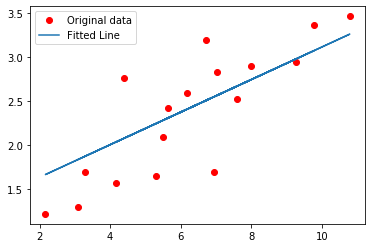

In [64]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x,Y:y})
            if(epoch+1)%display_step ==0:
                c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
                print('Epoch = %04d'%(epoch+1), ', cost = {:.9f}'.format(c), ', W = ', sess.run(W), ', b = ', sess.run(b))
    print('최적화 종료')
    training_cost = sess.run(cost, feed_dict={X:train_x, Y:train_y})
    print('T cost = ', training_cost, ', W = ', sess.run(W))
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W)*train_x + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()

In [ ]:
#model의 속을 들여다 볼 수 있고 진행과정을 알 수 있다.